# Project 3
**Jay Kynerd —** 
Fashion MINST

# Import the Data

In [27]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

categories = {
    0: 'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover',
    3:	'Dress',
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot'
}

***Sample image***

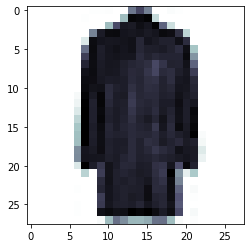

'Coat'

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(X_train[5462].reshape(28,28), cmap='bone_r')
plt.show()

categories[y_train[5462]]

# Ordinal Encoder

In [15]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

y_encoded = ordinal_encoder.fit_transform(y_train.reshape(-1,1))
y_encoded

array([[9.],
       [0.],
       [0.],
       ...,
       [3.],
       [0.],
       [5.]])

# One Hot Encoder

In [4]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

y_1hot = cat_encoder.fit_transform(y_train.reshape(-1,1))
y_1hot

<60000x10 sparse matrix of type '<class 'numpy.float64'>'
	with 60000 stored elements in Compressed Sparse Row format>

# SGD Classifier

In [5]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train[:100], y_train[:100])

prediction = sgd_clf.predict(X_test[65].reshape(1, -1))[0]
print('SGD predicts:', categories[prediction])

SGD predicts: Trouser


*testing...*

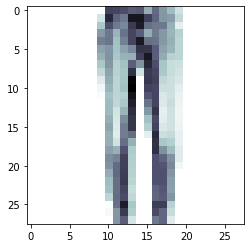

In [6]:
plt.imshow(X_test[65].reshape(28, 28), cmap='bone_r')
plt.show()

# Random Forest Regressor

In [7]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train[:1000], y_train[:1000])

prediction = forest_reg.predict(X_test[253].reshape(1, -1))[0]
print('Random Forest Regressor predicts:', categories[int(prediction)])

Random Forest Regressor predicts: Sandal


*testing...*

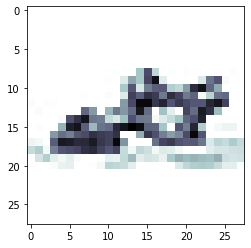

In [8]:
plt.imshow(X_test[253].reshape(28, 28), cmap='bone_r')
plt.show()

# K-neighbors Classifer

In [9]:
from sklearn.neighbors import KNeighborsClassifier


knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

prediction = knn_clf.predict(X_test[692].reshape(1, -1))[0]
print('K-Neighbors Classifier predicts:', categories[prediction])

K-Neighbors Classifier predicts: Ankle boot


*testing...*

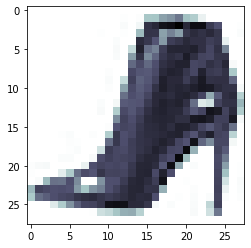

In [10]:
plt.imshow(X_test[692].reshape(28, 28), cmap='bone_r')
plt.show()

# OvO Classifier

In [52]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train[:1000], y_train[:1000])

prediction = svm_clf.predict(X_test[712].reshape(1, -1))[0]
print('OvO Classifier predicts:', categories[prediction])

OvO Classifier predicts: Sneaker


*testing...*

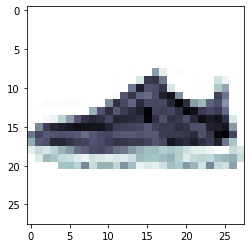

In [53]:
plt.imshow(X_test[712].reshape(28, 28), cmap='bone_r')
plt.show()


# Straified K-fold Validation

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    
    X_train_folds = X_train[train_index]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)

print('Number of corrent predictions: ', n_correct)

Number of corrent predictions:  16539


# Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix

prediction = knn_clf.predict(X_test)

confusion_matrix(prediction, y_test)

array([[855,   8,  24,  41,   2,   1, 176,   0,   2,   0],
       [  1, 968,   2,   8,   1,   0,   1,   0,   0,   0],
       [ 17,   4, 819,  15, 126,   0, 132,   0,  10,   0],
       [ 16,  12,  11, 860,  26,   0,  23,   0,   4,   0],
       [  3,   4,  75,  39, 773,   0,  80,   0,   7,   0],
       [  1,   0,   0,   0,   0, 822,   0,   3,   0,   2],
       [100,   3,  69,  34,  71,   5, 575,   0,  16,   1],
       [  1,   0,   0,   0,   0,  96,   0, 961,   7,  29],
       [  6,   1,   0,   3,   1,   1,  13,   0, 953,   0],
       [  0,   0,   0,   0,   0,  75,   0,  36,   1, 968]])

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf.fit(X_train[:1000], y_train[:1000])

prediction = voting_clf.predict(X_test[488].reshape(1, -1))[0]
print("Ensemble of classifiers predicts: ", categories[prediction])

/Users/kynerd/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble of classifiers predicts:  T-shirt/top


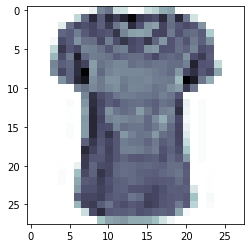

In [61]:
plt.imshow(X_test[488].reshape(28, 28), cmap='bone_r')
plt.show()